In [1]:
from tomoSegmentPipeline.utils.common import read_array, write_array
from tomoSegmentPipeline.utils import setup

from mwReconstruction.dataloader import destripeDataSet
from mwReconstruction.model import *
from mwReconstruction.losses import Loss
from mwReconstruction.trainer import train


import numpy as np
import matplotlib.pyplot as plt
import random
import mrcfile
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import os
from glob import glob
import scipy.io as io
# from skimage.metrics import structural_similarity as ssim
# from skimage.metrics import normalized_mutual_information as nmi
from scipy import ndimage
from joblib import Parallel, delayed

PARENT_PATH = setup.PARENT_PATH
ISONET_PATH = os.path.join(PARENT_PATH, 'data/isoNet/')

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

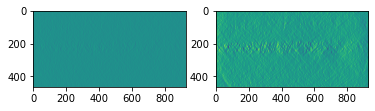

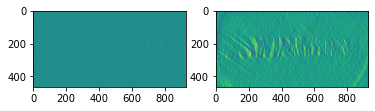

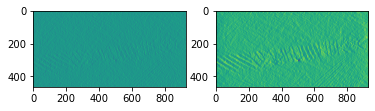

In [8]:
cet_path_deconv = os.path.join(ISONET_PATH, 'RAW_dataset/RAW_allTomos_deconv/%s.mrc')    
cet_path_raw = os.path.join(PARENT_PATH, 'data/raw_cryo-ET/%s.mrc') 

save_path = os.path.join(PARENT_PATH, 'data/dummies/')

for tomo in ['tomo32', 'tomo02', 'tomo10']: 
    data_raw = read_array(cet_path_raw %tomo)
    data_deconv = read_array(cet_path_deconv %tomo)
    
    z, y, x = data_raw.shape
    
    data_raw = data_raw[:, y//2, :]
    data_deconv = data_deconv[:, y//2, :]
    
    fig, (ax0, ax1) = plt.subplots(1, 2)
    ax0.imshow(data_raw)
    ax1.imshow(data_deconv)
    plt.show()
    
    savename_raw = os.path.join(save_path, '%s_raw_ZX.mrc' %tomo)
    write_array(data_raw, savename_raw)
    
    savename_deconv = os.path.join(save_path, '%s_deconv_ZX.mrc' %tomo)
    write_array(data_deconv, savename_deconv)